In [2]:
import sys
sys.path.append("../Nammu/evalutation_experiments/")

from nammu.evalutation_experiments.evaluate import evaluate_tda,compare_distributions
from nammu.curvature import forman_curvature
from nammu.curvature import ollivier_ricci_curvature
from nammu.curvature import resistance_curvature

sys.path.append("../")
from nammu.evalutation_experiments.evaluate import (
    compare_distributions, create_landscapes_persim,
    diagram_to_persim, create_diagrams, compare_distributions)
from nammu.topology import calculate_persistence_diagrams
from nammu.utils import make_node_filtration, propagate_edge_attribute_to_nodes, propagate_node_attribute_to_edges

In [23]:
# use local persim code
import persim

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib as mpl

# Load Sample Data

In [4]:
sample1 = pd.read_pickle("../patient_networks/network_construction_20230213/data/patient_network_sample1.pkl")
sample2 = pd.read_pickle("../patient_networks/network_construction_20230213/data/patient_network_sample2.pkl")

In [37]:
sample1.head()
sample1.columns

Index(['hsanum', 'year', 'G', 'nnodes', 'nedges', 'density',
       'degree_assortativity'],
      dtype='object')

In [5]:
# Isolate Graphs
graphs1 = list(sample1["G"].values[:5])
graphs2 = list(sample2["G"].values[:5])

# Curvature Filtrations

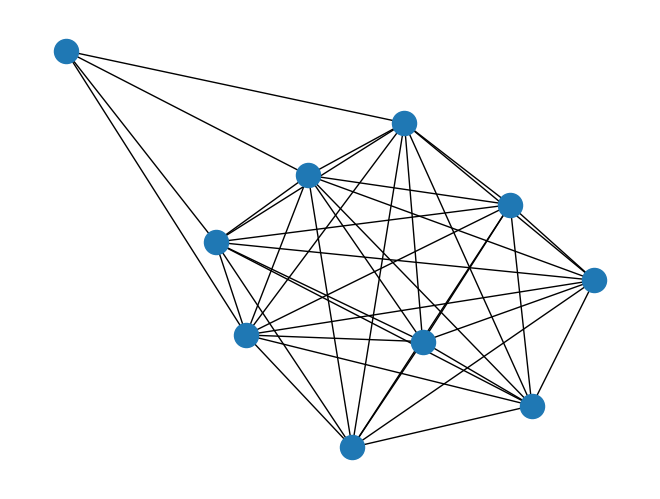

In [31]:
curvature_fn = forman_curvature

G = graphs1[np.random.randint(0,len(graphs1))]
nx.draw(G)

In [32]:
curvature = curvature_fn(G)
G = make_node_filtration(G, curvature, attribute_name="curvature")
print(f"Curvature Values: {curvature}")

Curvature Values: [ 0. 10. 10. 10.  8.  8.  8.  8.  8.  0.  0.  0. 10.  8.  8.  8.  8.  8.
 10.  8.  8.  8.  8. 10.  8.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9.  9.
  9.  9.  9.  9.]


## Generate Diagrams

In [43]:
#Sample Diagram
G_dgm = calculate_persistence_diagrams(G,"curvature","curvature")
G_dgm[1]

8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
8.0	10.0
9.0	10.0
9.0	10.0
9.0	10.0
9.0	10.0
9.0	10.0
9.0	10.0
9.0	10.0
9.0	10.0
9.0	10.0
9.0	10.0
10.0	10.0
10.0	10.0
10.0	10.0
10.0	10.0
10.0	10.0
10.0	10.0

In [45]:
diagrams = create_diagrams(curvature_fn,graphs1)

## Generate Landscapes

In [36]:
#Exact
exact_landscapes1 = create_landscapes_persim(curvature_fn,graphs1,hom_deg=0,exact=True)



crit_points = exact_landscapes1[0].compute_landscape()

print(f"Dim 0 Crit Points: \n {crit_points[0]} \n")
print(f"Dim 1 Crit Points: \n {crit_points[1]} ")

Dim 0 Crit Points: 
 [[-83.0, 0], [1.5, 84.5], [86.0, 0]] 

Dim 1 Crit Points: 
 [[-82.0, 0], [-78.0, 4.0], [-74.0, 0], [-48.0, 0], [-41.0, 7.0], [-34.0, 0], [-33.0, 0], [-28.0, 5.0], [-23.0, 0]] 


In [38]:
#Approx
landscapes1 = create_landscapes_persim(curvature_fn,graphs1,hom_deg=0,exact=False)

Bad choice of grid, values is empty


## Smoke Permutation Test

In [15]:
compare_distributions(graphs1,graphs2,curvature_fn,num_perms=5,num_runs=5)

There were 3 shuffles out of 5 that were more significant than the true labeling
The p-value is 0.6 and in particular,     
 The true significance score is -0.29 standard deviations above the mean of permutation scores.


(13.557746862956245,
 [14.171825041257032,
  24.387753074032883,
  4.863447851062043,
  42.231423430900364,
  3.175393676380926],
 3)